* Thresholding: convert grayscale images to binary, or generally to segment objects from the background
* Image segmentation: to find meaningful regions
* RAG(regional adacency graphs): data structure used in segmentation. 
  Each region in image is represented as a graph node in RAG. 
  Weight of edge = difference between average colors of pixels in each region
  Weight of edge siginifies difference between regions: edge weight small -> regions are similar. edge weight big --> regions are different
* Watershed algo
* Structural similarity index to measure distance between images

Two kinds of thresholding:
    1. global thresholding (e.g. threshold_otsu())
    create histogram of all pixel intensities in the image, and then look for peaks
    fast and efficient, but ignores relationships between neighbors
    2. local thresholding (e.g. cv.adaptiveThreshold)
    for each pixel, only consider intensities of neighbors
    slow to compute, but it captures relationships between pixels
    useful hen there is large variation in the background intensity

## Thresholding

In [3]:
import matplotlib.pyplot as plt
import cv2

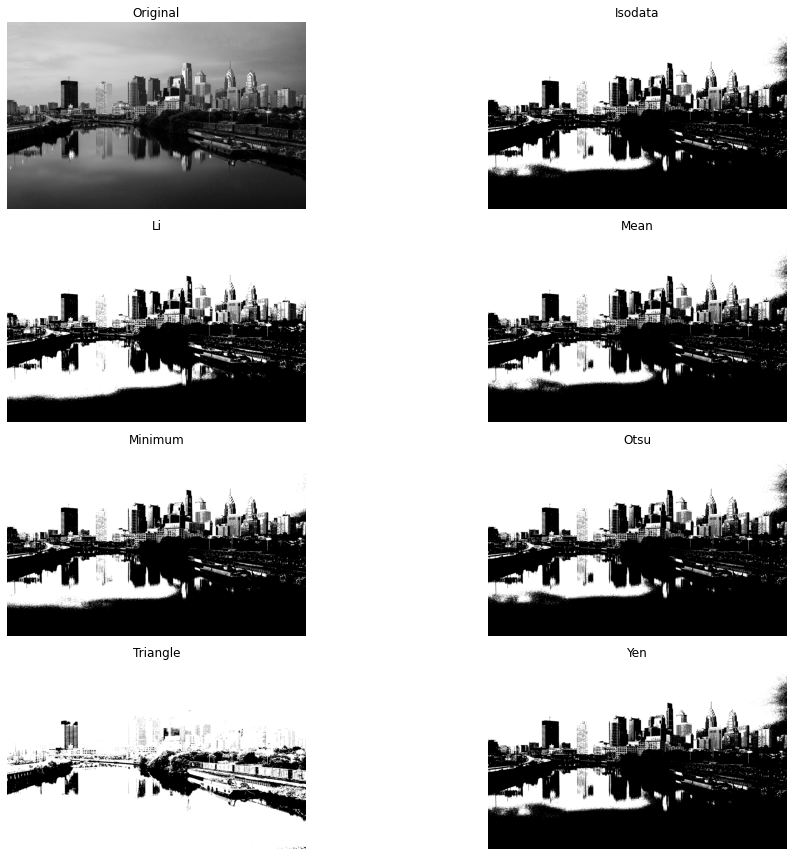

In [5]:
from skimage.filters import try_all_threshold

img = cv2.imread("images/sky.jpeg",cv2.IMREAD_GRAYSCALE)
fig,ax = try_all_threshold(img,figsize=(16,12),verbose=False)
plt.show()

## RAG(Region Adjacency Graph) thresholding

image segmentation with `segmentation.slic`, which uses k-means clustering to segment regions

In [6]:
from matplotlib import pyplot as plt
from skimage import data,io,segmentation,color
from skimage.future import graph

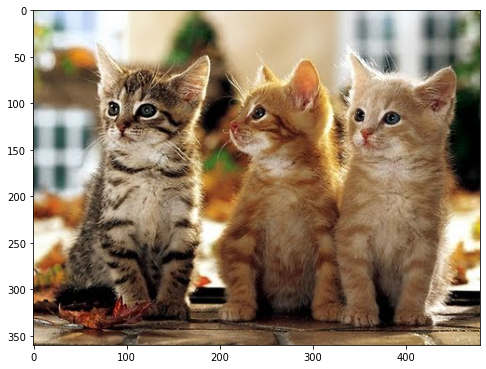

In [9]:
cats = io.imread("images/three_cats.jpeg")

plt.figure(figsize=(8,8))
plt.imshow(cats)

In [14]:
labels_1 = segmentation.slic(cats,
                             compactness=35, # balance color and space proximity. high value emphasies spatial closeness 
                             # and the segments are squarish
                             n_segments = 100)
labels_1.shape

/Users/anyi.guo/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  after removing the cwd from sys.path.


(360, 480)

In [12]:
labels_1

array([[0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3],
       ...,
       [8, 8, 8, ..., 9, 9, 9],
       [8, 8, 8, ..., 9, 9, 9],
       [8, 8, 8, ..., 9, 9, 9]])

Overlap the segment on the original image to visualise

/Users/anyi.guo/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  """Entry point for launching an IPython kernel.


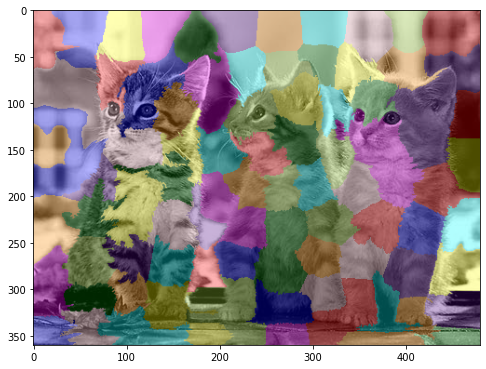

In [15]:
seg_overlay = color.label2rgb(labels_1, cats, kind='overlay')

plt.figure(figsize=(8,8))
plt.imshow(seg_overlay)

RAG thresholding merges segments of an image based on how similar they are - edges in this graph are the difference in the mean color

In [16]:
g = graph.rag_mean_color(cats,labels_1)

In [21]:
labels_2 = graph.cut_threshold(labels_1, g, 
                               thresh=15 # combine regions seperates by a weight less than the threshold
                              )

/Users/anyi.guo/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  """Entry point for launching an IPython kernel.


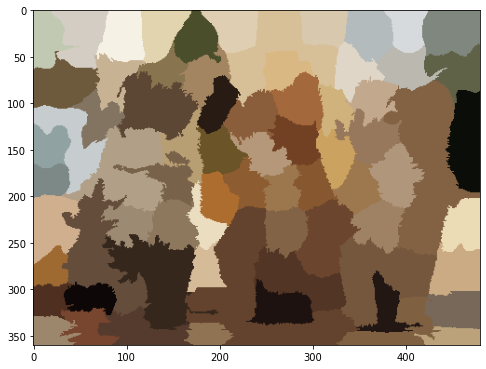

In [23]:
seg_rag = color.label2rgb(labels_2, cats, kind='avg')

plt.figure(figsize=(8,8))
plt.imshow(seg_rag)
